In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os,re
sys.path.append("../shared/utilsGRF/")
import AnalyseBoundarysearch
from shutil import copyfile
sys.path.append("./scripts")
sys.path.append("./cflinux/")
sys.path.append("./cfmac/")
import pandas as pd
import BoundaryFinder as BF
import matplotlib as mpl
import PolAB_A_allpars

In [2]:


def compute_syn(parset):
    mstars=[]
    
    for i in range(4):
        if i==0:
            A=0.0
            B=0.0
        elif i==1:
            A=2.0
            B=0.0
        elif i==2:
            A=0.0
            B=2.0
        else:
            A=1.0
            B=1.0
        m=GRFA(parset2.copy(),np.array([B]),A) #in some cases I have observed weird behaviour if the array is passed multiple times so it is safest to copy. 
        mstars.append(m)
    if mstars[1]>mstars[2]:
        r=(mstars[1]/mstars[2])
    else:
        print("wrong A-B")
        return [None,None]
    
    result=[np.log2(mstars[3]/mstars[1]),np.log2(mstars[3]/mstars[2])]
    return result

In [9]:
#check
allcases=["any","difAD_difbnp","difAD_samebnp","difAD_samebnp_step12","difAD_samebnp_step13","difAD_samebnp_step23","difAD_samebnp_step11","sameAD_difbp","sameAD_difbp_kuonly","sameAD_difbnp","empty"]

cols_basal=["ktia0","ktan0","ktni0","ktin0"]
cols_A=["ktiaA","ktanA","ktniA","ktinA"]
cols_B=["ktiaB","ktanB","ktniB","ktinB"]
cols_bA=["kbAn","kbAi","kbAa","kuAn","kuAi","kuAa"]
cols_bB=["kbBn","kbBi","kbBa","kuBn","kuBi","kuBa"]
bases=["2020_03_28_kPolconstr1000_cont","2020_03_26_kPolconstr1000_100basal","2020_04_03_kPolconstr100_100basal"]
fcu=[1000,1000,100]

In [5]:
for c,case in enumerate(allcases):
    for b,base in enumerate(bases):
        df=pd.read_pickle("%s_%s.df"%(base,case))
        basal=df[cols_basal].values
        A=df[cols_A].values
        B=df[cols_B].values

        #first check that fc up and down is correct
        for X in [A,B]:
            non1000X=np.sum((X[:,:3]/basal[:,:3])>fcu[b]+0.01)
            if non1000X>0:
                print("wrong")
            else:
                print("fcuX",end=",")
        for X in [A,B]:
            nonlow=np.sum((X[:,-1]/basal[:,-1])>1.00001)
            nonlow1000=np.sum((X[:,-1]/basal[:,-1])<0.0009)
            if nonlow>0:
                print("wrong nonlow")
            if nonlow1000>0:
                print("wrong nonlow1000")
            else:
                print("low1000",end=",")
        print(" ")

        #then check that the conditions of each case are fulfilled
        if "sameAD" in case:
            print("sameAD", np.all((A/B)==1))
        if "sameb" in case:
            bA=df[cols_bA].values
            bB=df[cols_bB].values
            print("sameB",np.all(bA/bB)==1)

        #for those where there is only action at particular steps, check that it is correct
        if "step" in case:
            steps=case[-2:]
            if steps=="12":
                idx1=2
                idx2=0
            elif steps=="13":
                idx1=2
                idx2=1
            elif steps=="23":
                idx1=0
                idx2=1
            print(case,steps,idx1,idx2)

            A1=(A[:,idx1]/basal[:,idx1])
            B1=(B[:,idx1]/basal[:,idx1])
            A2=(A[:,idx2]/basal[:,idx2])
            B2=(B[:,idx2]/basal[:,idx2])
            for r in range(len(df)):
                actionA1=np.abs(A1[r]-1)>0.001
                actionB1=np.abs(B1[r]-1)>0.001
                actionA2=np.abs(A2[r]-1)>0.001
                actionB2=np.abs(B2[r]-1)>0.001
                if (actionA1 and actionB1) or (actionA2 and actionB2):
                    print("wrong ",A1[r],B1[r],A2[r],B2[r])
                else:
                    #print(".",end=',')
                    #print("correct",actionA1,actionA2)
                    if actionA1:
                        compareidx=idx1
                    elif actionA2:
                        compareidx=idx2
                    else:
                        compareidx=-1
                    if compareidx>-1:
                        for idx in range(3):
                            if idx!=compareidx:
                                #print("comparingA")
                                if np.sum(np.abs((A[r,idx]/basal[r,idx])-1)>0.001)>0:
                                    print("wrong others A")
                                #else:
                                #    print(idx,end=",")
                    if actionB1:
                        compareidx=idx1
                    elif actionB2:
                        compareidx=idx2
                    else:
                        compareidx=-1
                    if compareidx>-1:
                        for idx in range(3):
                            if idx!=compareidx:
                                if np.sum(np.abs((B[r,idx]/basal[r,idx])-1)>0.001)>0:
                                    print("wrong others B")
                                #else:
                                #    print(idx,end=",")

            
    
    
        

fcuX,fcuX,low1000,low1000, 
fcuX,fcuX,low1000,low1000, 
fcuX,fcuX,low1000,low1000, 
fcuX,fcuX,low1000,low1000, 
fcuX,fcuX,low1000,low1000, 
fcuX,fcuX,low1000,low1000, 
fcuX,fcuX,low1000,low1000, 
sameB True
fcuX,fcuX,low1000,low1000, 
sameB True
fcuX,fcuX,low1000,low1000, 
sameB True
fcuX,fcuX,low1000,low1000, 
sameB True
difAD_samebnp_step12 12 2 0
fcuX,fcuX,low1000,low1000, 
sameB True
difAD_samebnp_step12 12 2 0
fcuX,fcuX,low1000,low1000, 
sameB True
difAD_samebnp_step12 12 2 0
fcuX,fcuX,low1000,low1000, 
sameB True
difAD_samebnp_step13 13 2 1
fcuX,fcuX,low1000,low1000, 
sameB True
difAD_samebnp_step13 13 2 1
fcuX,fcuX,low1000,low1000, 
sameB True
difAD_samebnp_step13 13 2 1
fcuX,fcuX,low1000,low1000, 
sameB True
difAD_samebnp_step23 23 0 1
fcuX,fcuX,low1000,low1000, 
sameB True
difAD_samebnp_step23 23 0 1
fcuX,fcuX,low1000,low1000, 
sameB True
difAD_samebnp_step23 23 0 1
fcuX,fcuX,low1000,low1000, 
sameB True
difAD_samebnp_step11 11 0 1
fcuX,fcuX,low1000,low1000, 
sameB True
difAD_

In [6]:
import matplotlib as mpl
mpl.rcParams["font.size"]=10

In [8]:
allcases=["empty","any","difAD_difbnp","difAD_samebnp",
          "difAD_samebnp_step12","difAD_samebnp_step13","difAD_samebnp_step23","difAD_samebnp_step11",
          "sameAD_difbp","sameAD_difbp_kuonly","sameAD_difbnp"]
cols_basal=["ktia0","ktan0","ktni0","ktin0"]
cols_A=["ktiaA","ktanA","ktniA","ktinA"]
cols_B=["ktiaB","ktanB","ktniB","ktinB"]
cols_bA=["kbAn","kbAi","kbAa","kuAn","kuAi","kuAa"]
cols_bB=["kbBn","kbBi","kbBa","kuBn","kuBi","kuBa"]
step=0.025
col_ar=np.arange(-5,15+step,step) #(-5,10 for last base)
row_ar=np.arange(-5,15+step,step) #(-5,10 for last base)
fccases1=['fc1=5_fc2=2', 'fc1=5_fc2=5', 'fc1=10_fc2=5', 'fc1=10_fc2=10']
fccases2=['fc1=5_fc2=2.5', 'fc1=5_fc2=5', 'fc1=10_fc2=5', 'fc1=10_fc2=10']

In [9]:
import alphashape

In [10]:
allpoints=dict()
allashapes=dict()
for cnum,case in enumerate(allcases):
    print(case)
    allpoints[case]=dict()
    #allashapes[case]=[[] for b in bases]
    for b,base in enumerate(bases):
        df=pd.read_pickle("%s_%s.df"%(base,case))
        
        fccases=pd.unique(df["fc1fc2"])
        allpoints[case][base]=dict()
        print(fccases)
        for d,fc in enumerate(fccases):
            subdf=df[df["fc1fc2"]==fc]
            mat=np.zeros((len(row_ar),len(col_ar)))
            SBA=subdf["SBA"].values
            SAB=subdf["SAB"].values
            matpars=np.zeros((len(row_ar),len(col_ar)))
            for r in range(len(subdf)):
                rowv=SBA[r]
                colv=SAB[r]
                idxr=np.where(row_ar>=rowv)[0][0]
                idxc=np.where(col_ar>=colv)[0][0]
                mat[idxr,idxc]=1

            B=BF.BoundaryExplorer(mat=mat,row_ar=row_ar,col_ar=col_ar)
            B.find_boundary_points()
            points=[]
            for r in range(len(row_ar)):
                for c in range(len(col_ar)):
                    if B.indices_boundary_all[r,c]>0:
                        points.append([col_ar[c],row_ar[r]])
            #ashape=alphashape.alphashape(points)
            #for pt in points:
            #    plt.scatter(*pt)
            #    plt.title("%s,%s\n%s"%(case,base,fc))
            #plt.plot(*ashape.exterior.xy)
            #plt.show()
            allpoints[case][base][fc]=points
            #allashapes[case][fnum].append([ashape.exterior.xy,fc])
    

empty
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
any
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
difAD_difbnp
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
difAD_samebnp
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
difAD_samebnp_step12
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10']
['fc1=5_fc2=2.5' 'fc1=5_fc2=5' 'fc1=10_fc2=5' 'fc1=10_fc2=10

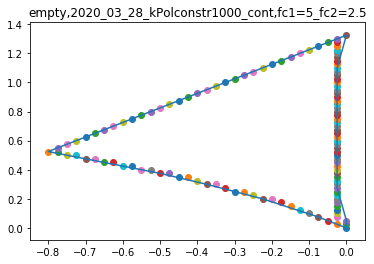

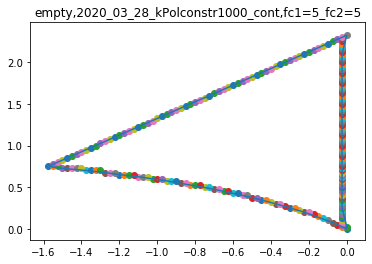

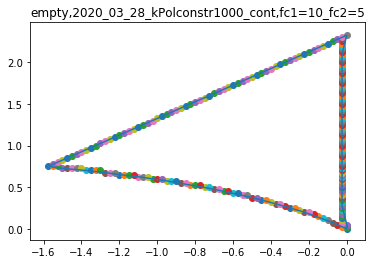

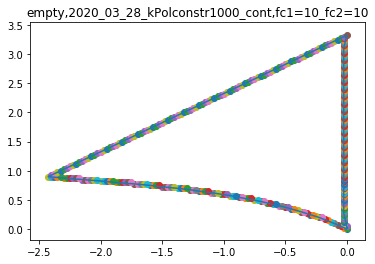

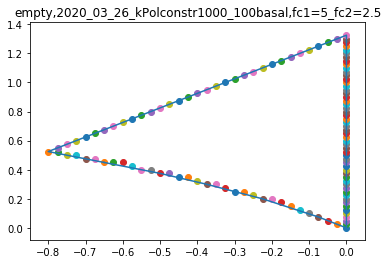

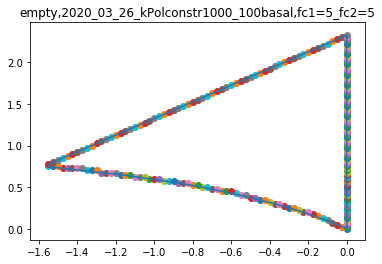

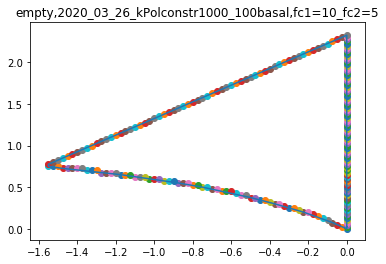

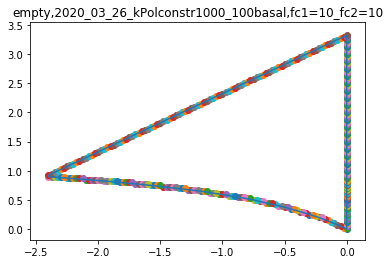

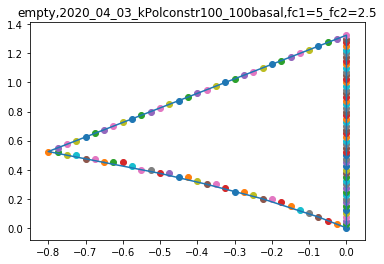

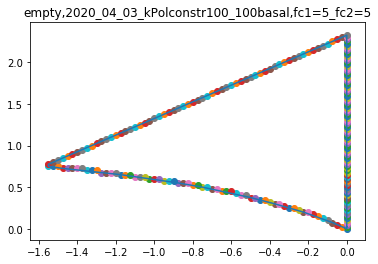

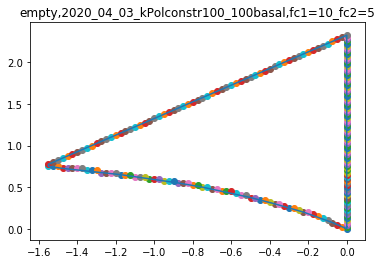

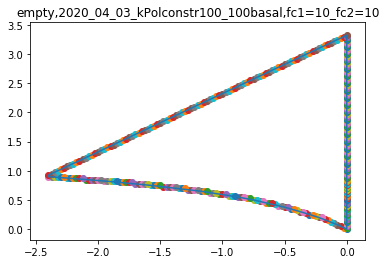

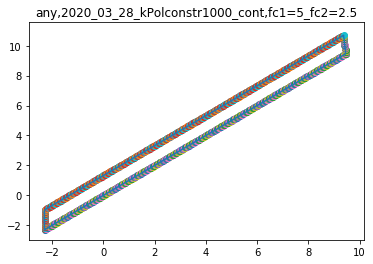

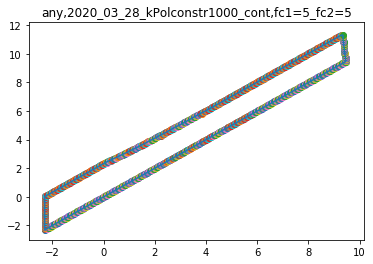

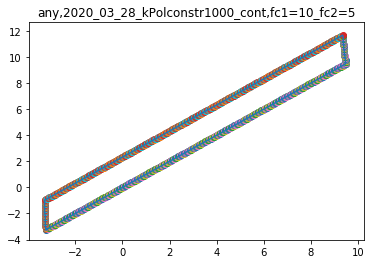

********* any 2020_03_28_kPolconstr1000_cont fc1=10_fc2=10


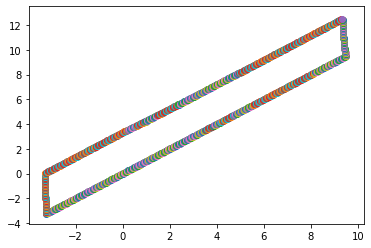

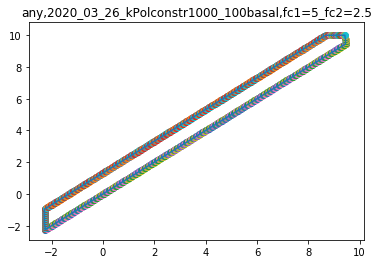

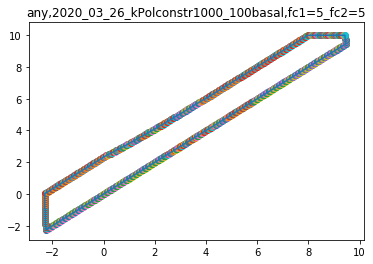

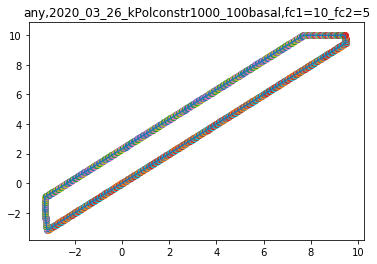

********* any 2020_03_26_kPolconstr1000_100basal fc1=10_fc2=10


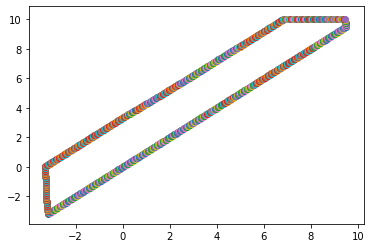

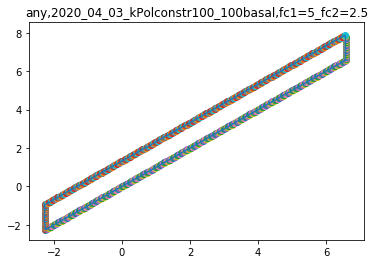

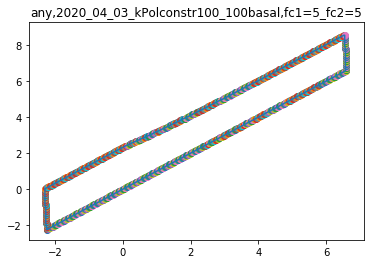

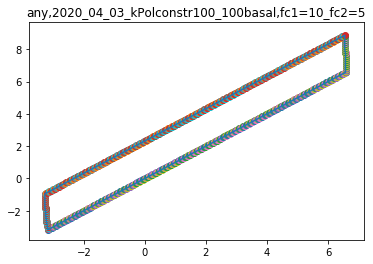

********* any 2020_04_03_kPolconstr100_100basal fc1=10_fc2=10


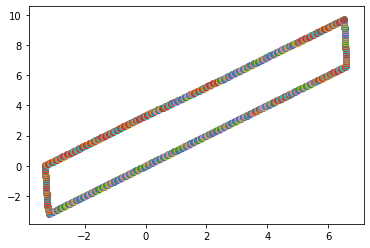

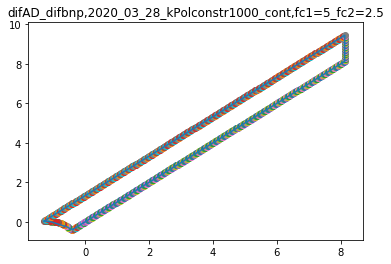

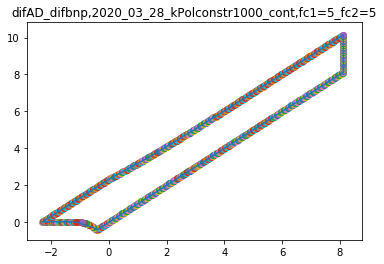

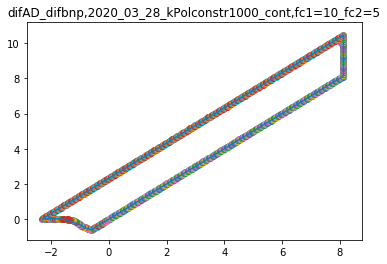

********* difAD_difbnp 2020_03_28_kPolconstr1000_cont fc1=10_fc2=10


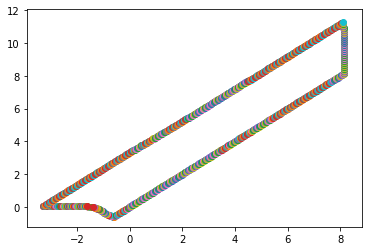

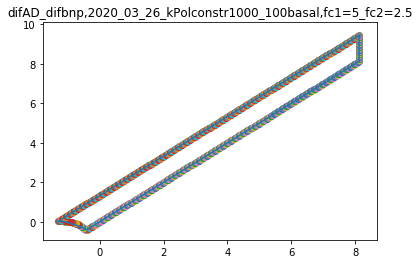

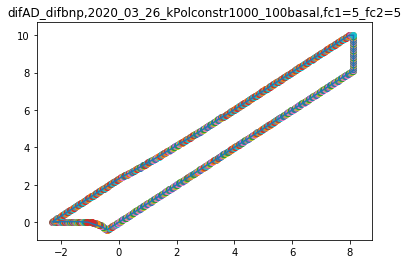

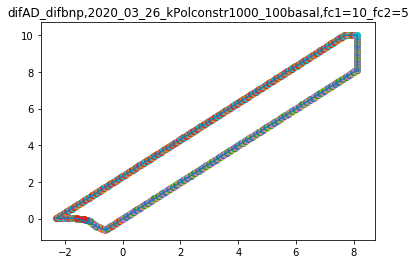

********* difAD_difbnp 2020_03_26_kPolconstr1000_100basal fc1=10_fc2=10


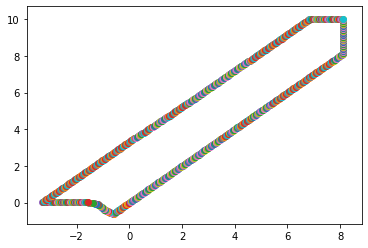

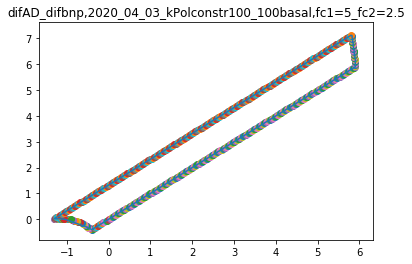

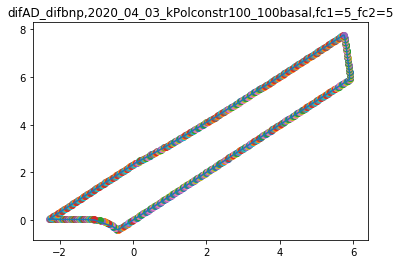

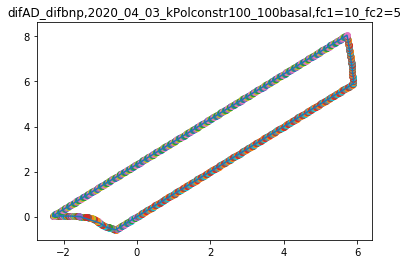

********* difAD_difbnp 2020_04_03_kPolconstr100_100basal fc1=10_fc2=10


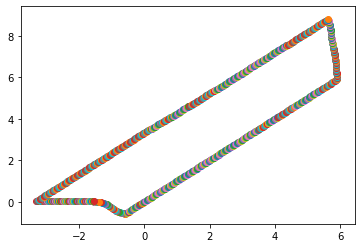

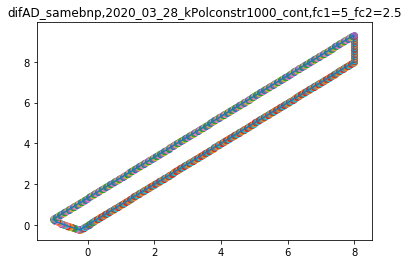

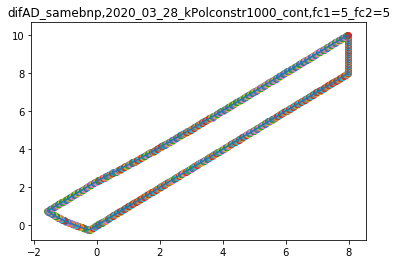

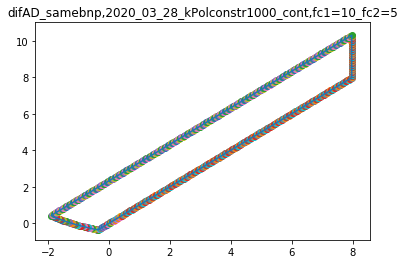

********* difAD_samebnp 2020_03_28_kPolconstr1000_cont fc1=10_fc2=10


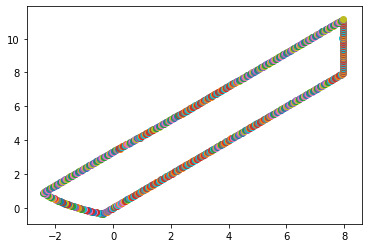

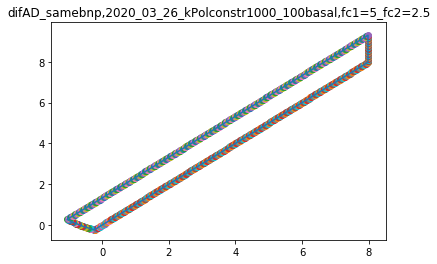

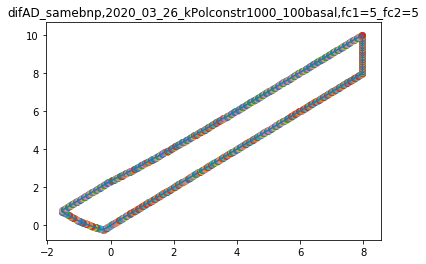

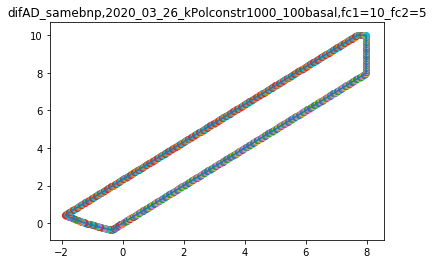

********* difAD_samebnp 2020_03_26_kPolconstr1000_100basal fc1=10_fc2=10


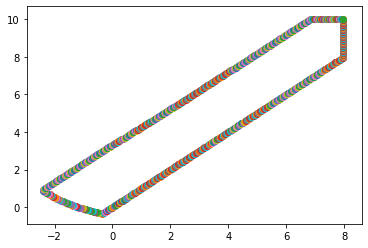

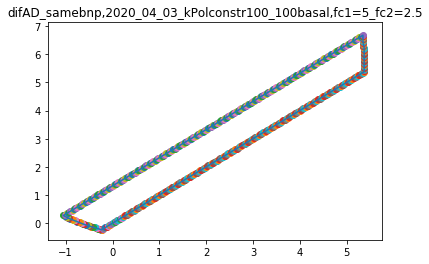

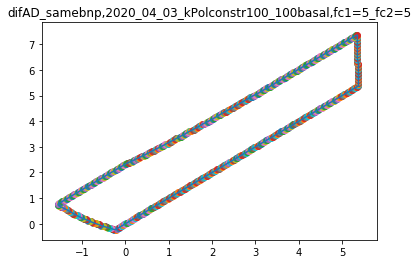

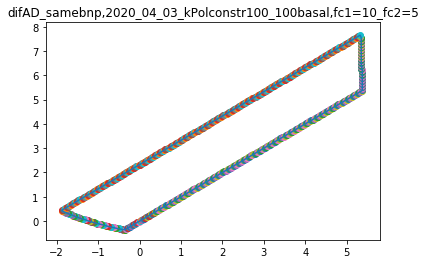

********* difAD_samebnp 2020_04_03_kPolconstr100_100basal fc1=10_fc2=10


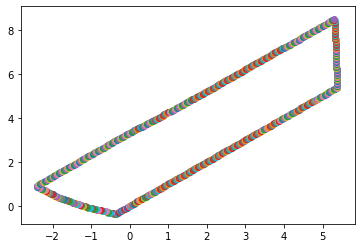

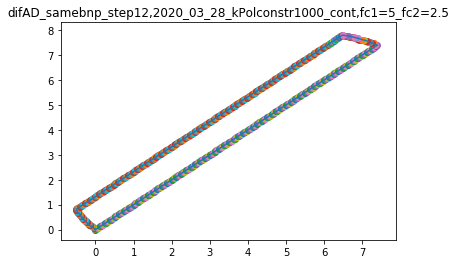

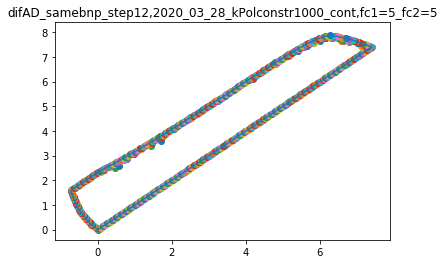

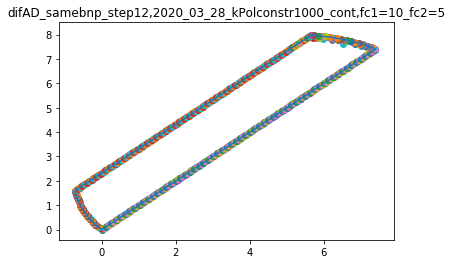

********* difAD_samebnp_step12 2020_03_28_kPolconstr1000_cont fc1=10_fc2=10


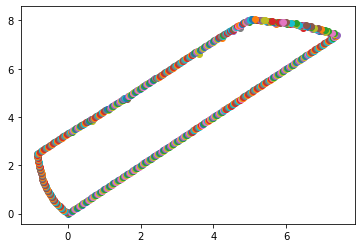

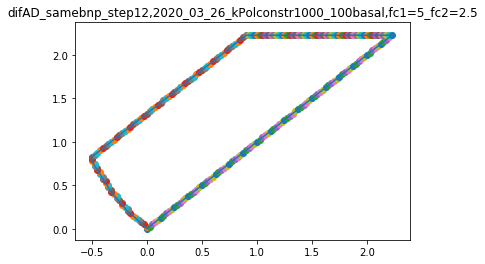

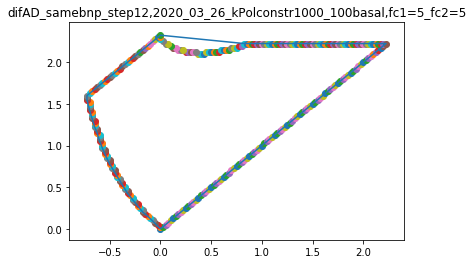

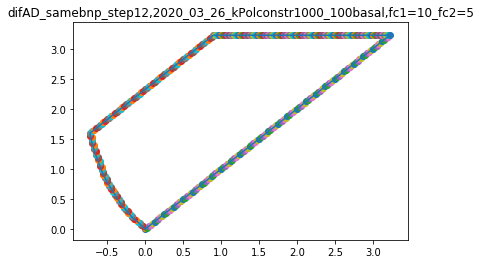

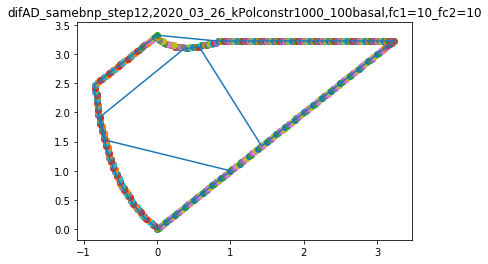

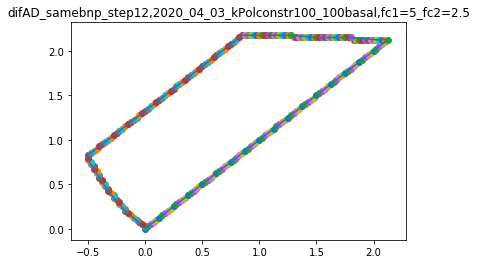

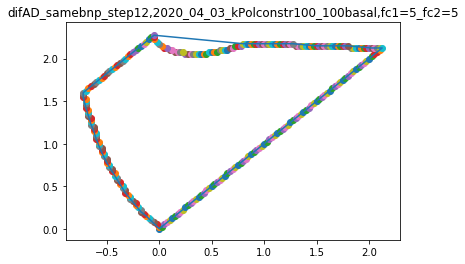

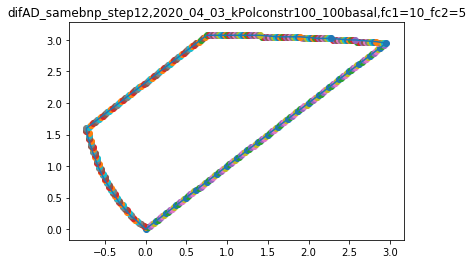

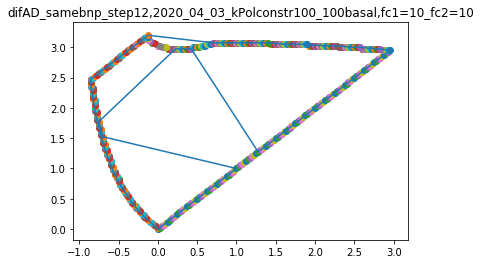

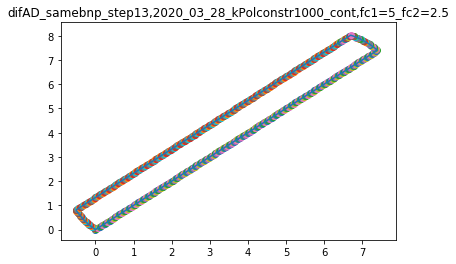

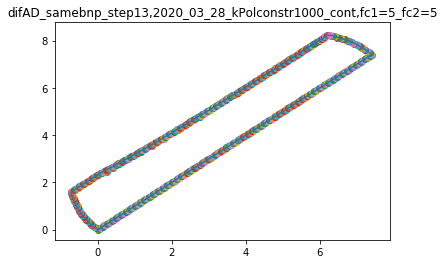

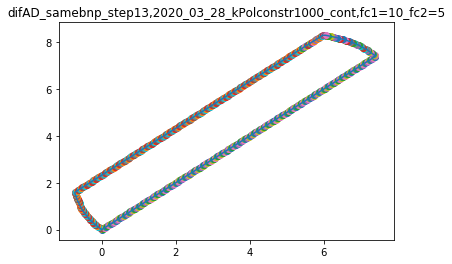

********* difAD_samebnp_step13 2020_03_28_kPolconstr1000_cont fc1=10_fc2=10


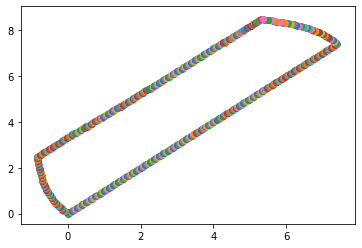

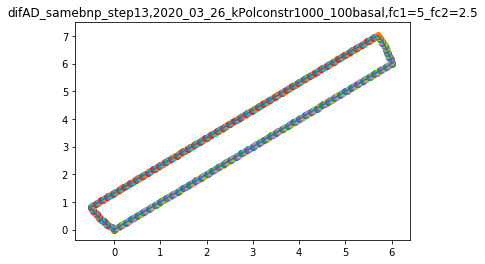

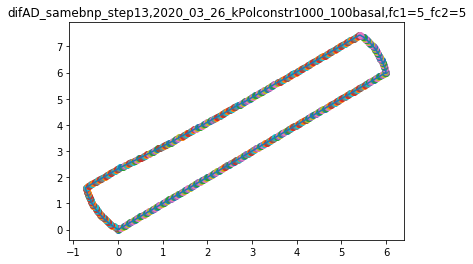

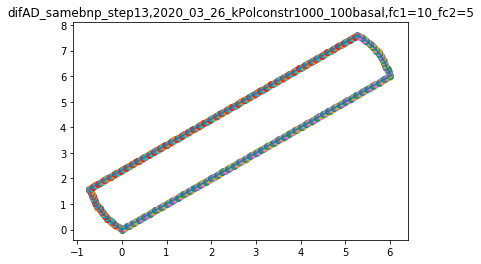

********* difAD_samebnp_step13 2020_03_26_kPolconstr1000_100basal fc1=10_fc2=10


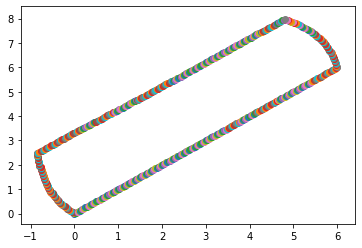

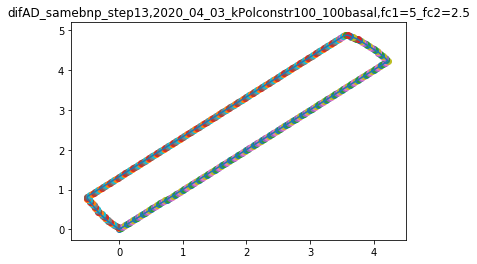

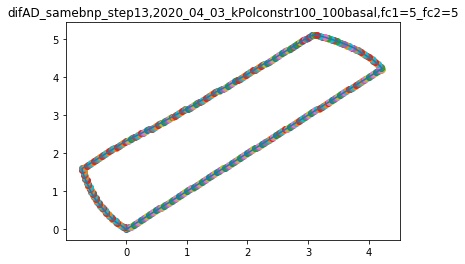

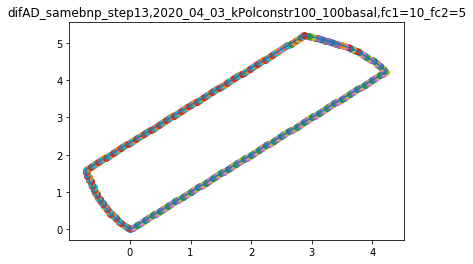

********* difAD_samebnp_step13 2020_04_03_kPolconstr100_100basal fc1=10_fc2=10


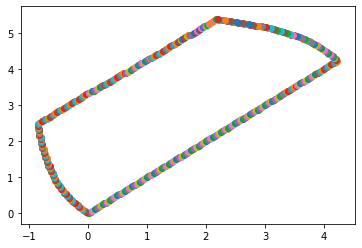

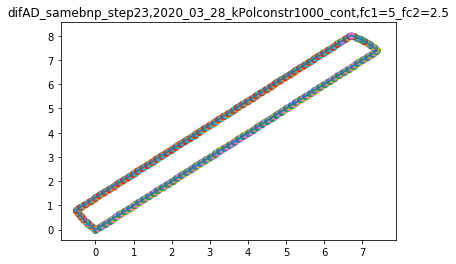

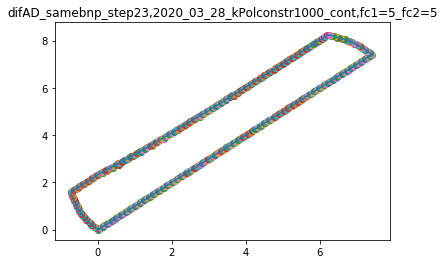

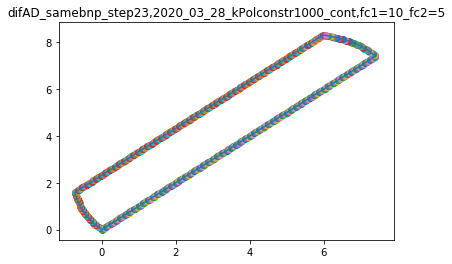

********* difAD_samebnp_step23 2020_03_28_kPolconstr1000_cont fc1=10_fc2=10


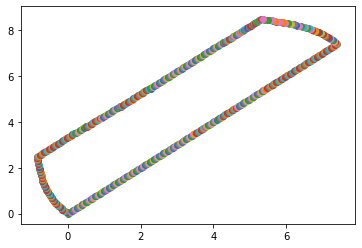

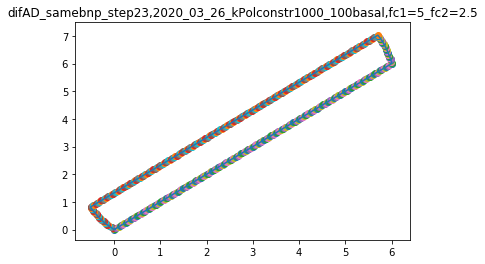

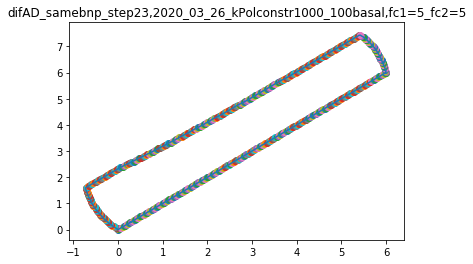

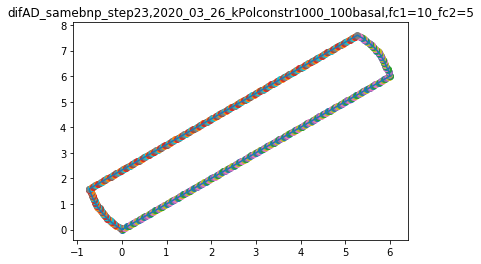

********* difAD_samebnp_step23 2020_03_26_kPolconstr1000_100basal fc1=10_fc2=10


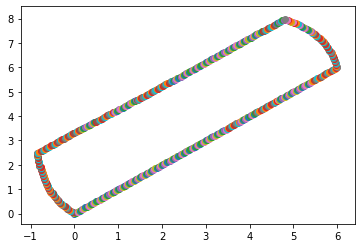

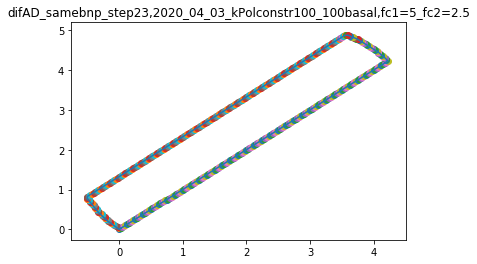

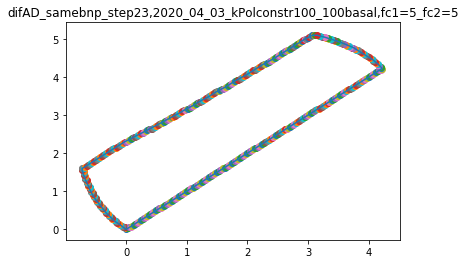

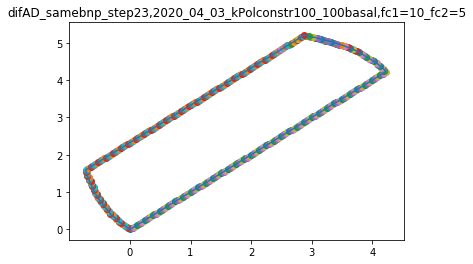

********* difAD_samebnp_step23 2020_04_03_kPolconstr100_100basal fc1=10_fc2=10


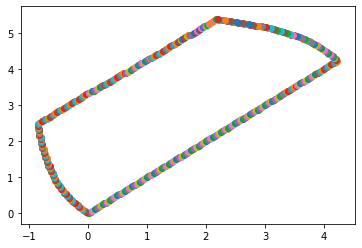

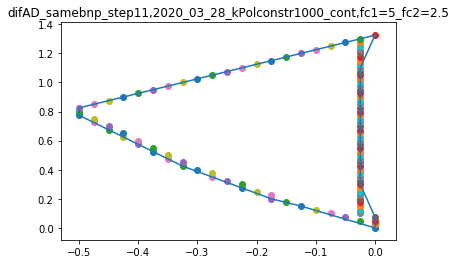

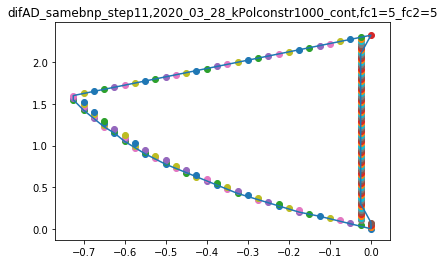

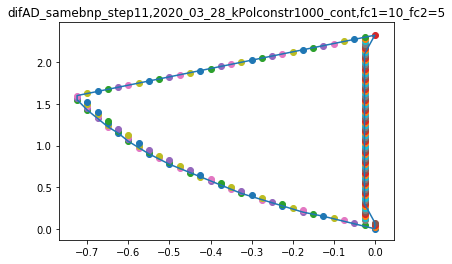

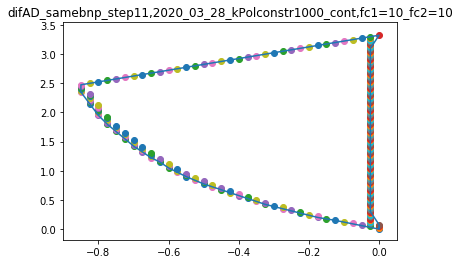

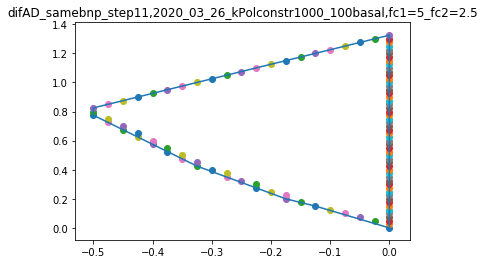

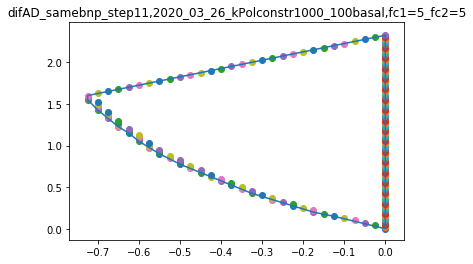

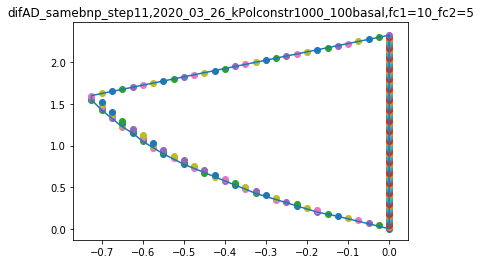

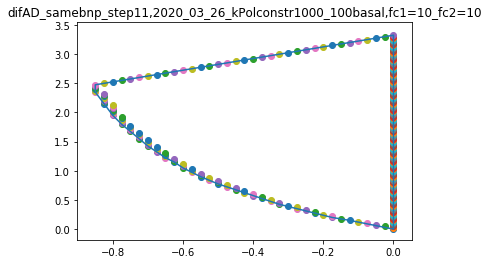

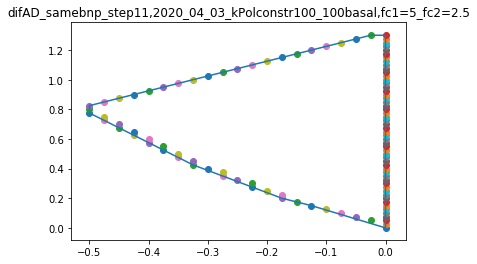

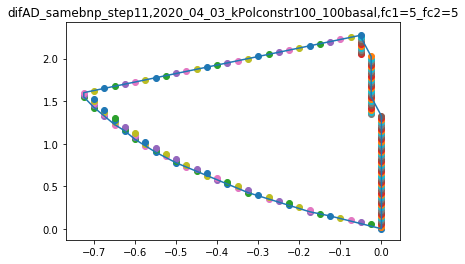

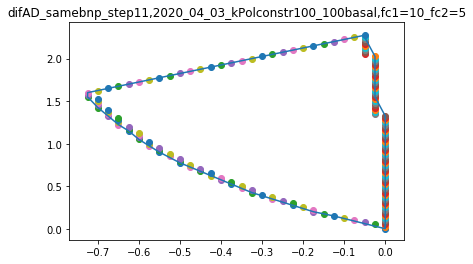

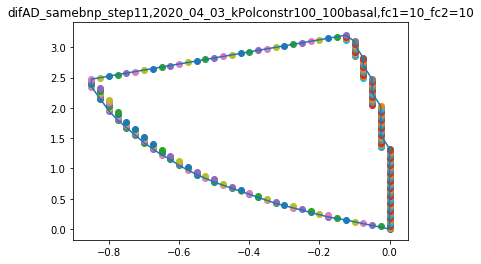

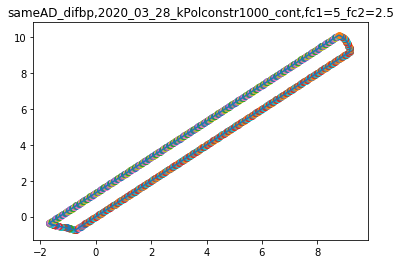

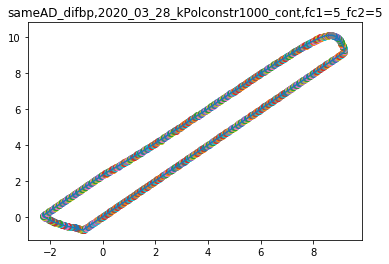

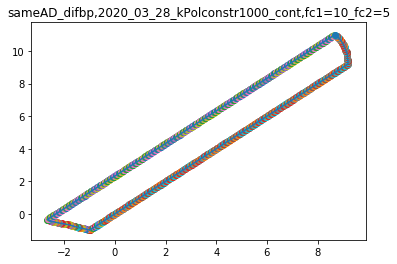

********* sameAD_difbp 2020_03_28_kPolconstr1000_cont fc1=10_fc2=10


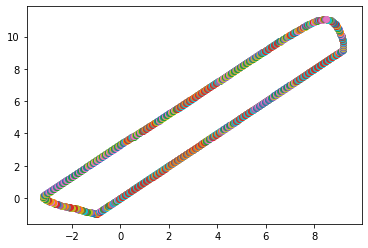

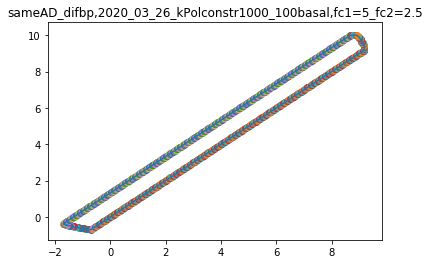

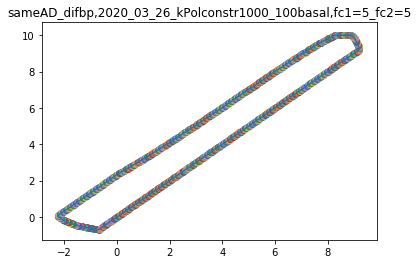

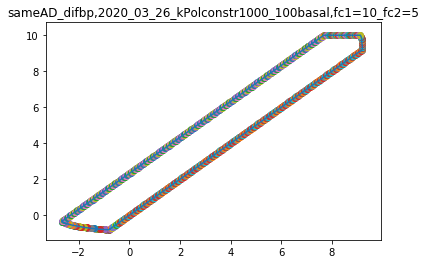

********* sameAD_difbp 2020_03_26_kPolconstr1000_100basal fc1=10_fc2=10


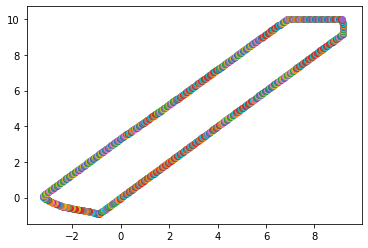

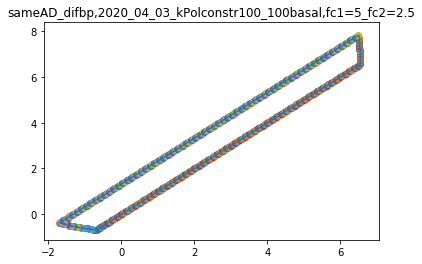

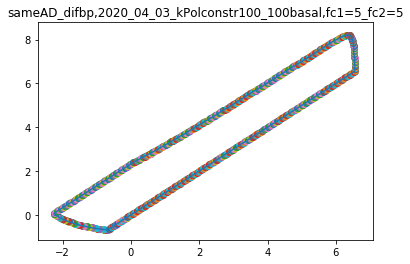

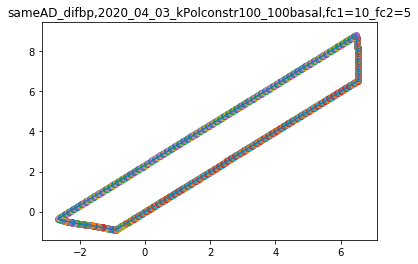

********* sameAD_difbp 2020_04_03_kPolconstr100_100basal fc1=10_fc2=10


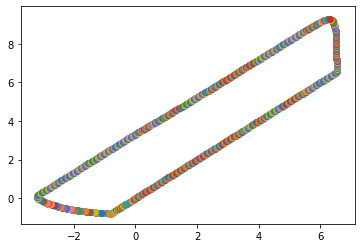

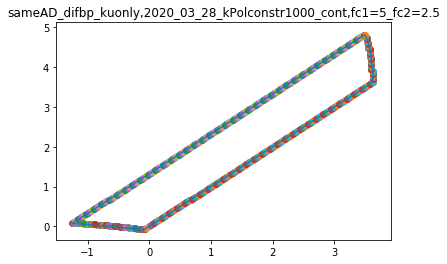

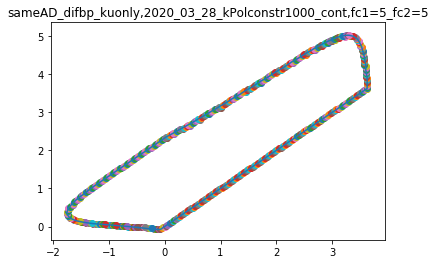

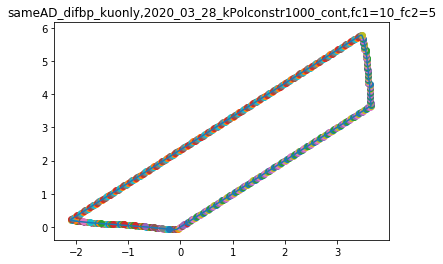

********* sameAD_difbp_kuonly 2020_03_28_kPolconstr1000_cont fc1=10_fc2=10


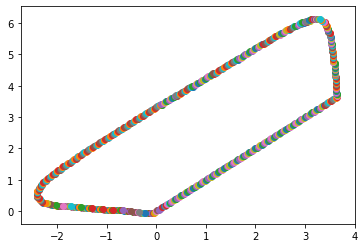

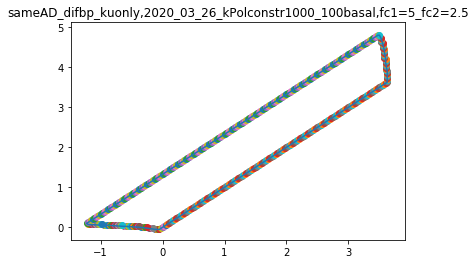

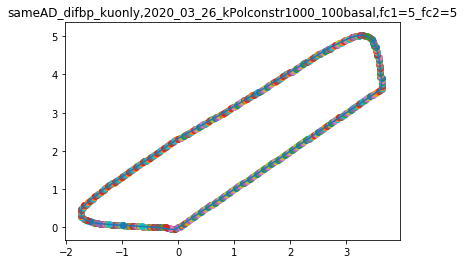

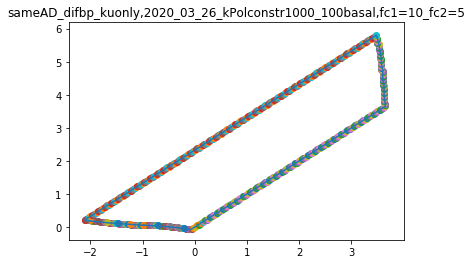

********* sameAD_difbp_kuonly 2020_03_26_kPolconstr1000_100basal fc1=10_fc2=10


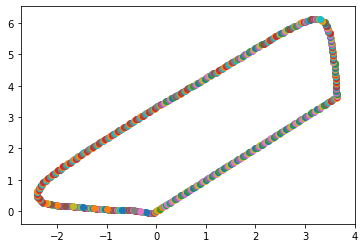

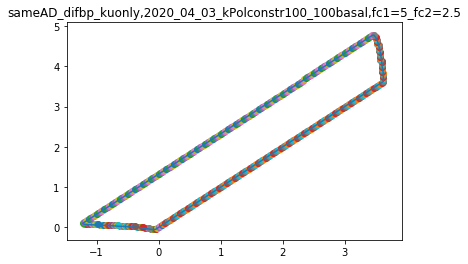

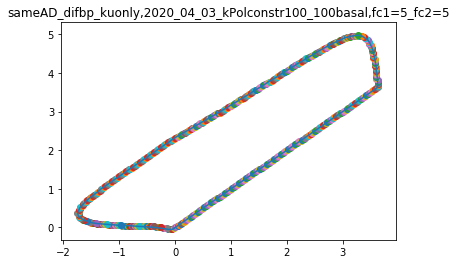

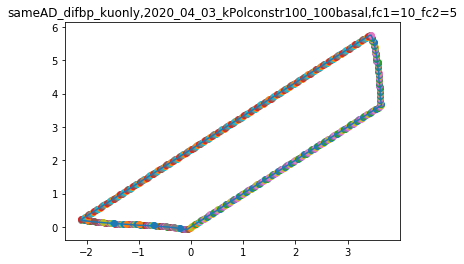

********* sameAD_difbp_kuonly 2020_04_03_kPolconstr100_100basal fc1=10_fc2=10


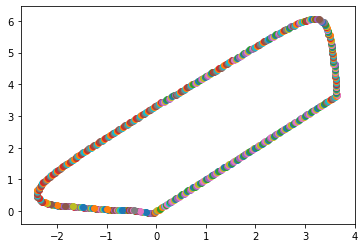

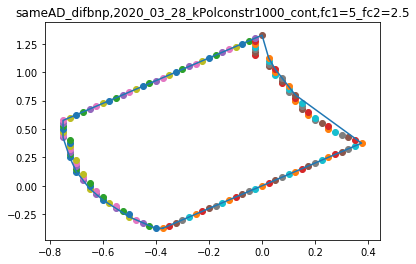

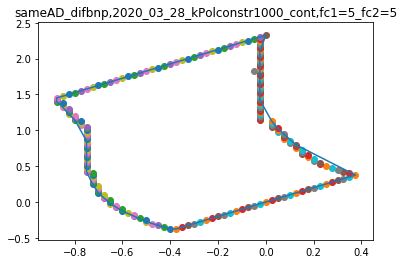

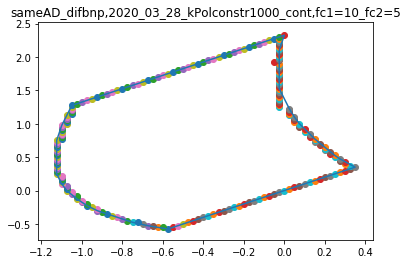

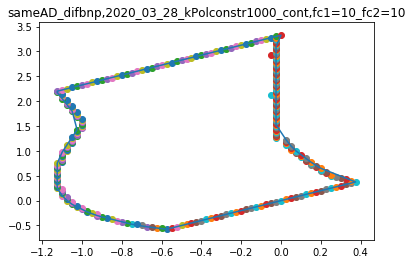

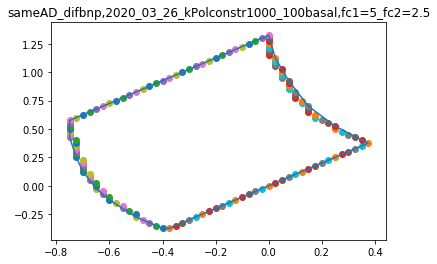

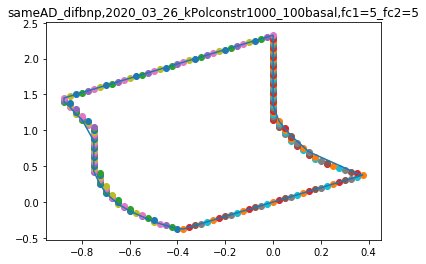

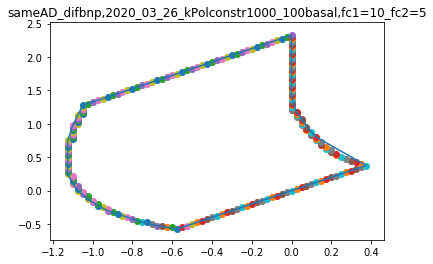

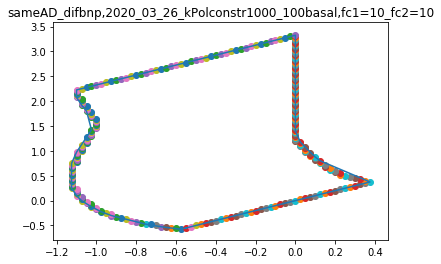

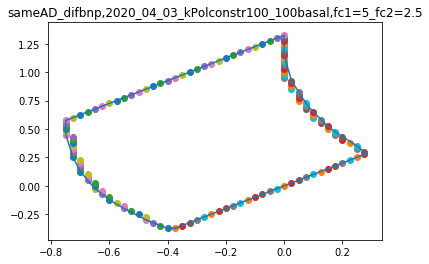

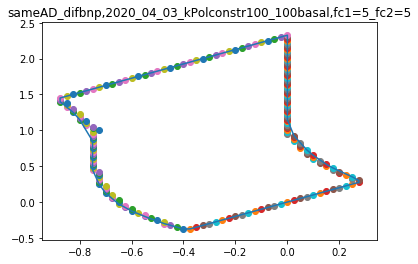

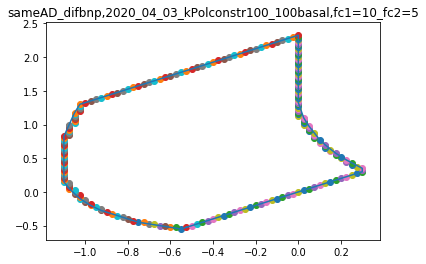

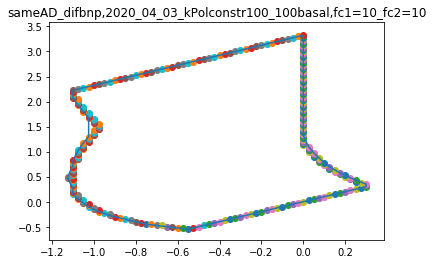

In [11]:
allashapes=dict()
for cnum,case in enumerate(allcases):
    allashapes[case]=dict()
    for base in allpoints[case].keys():
        allashapes[case][base]=dict()
        for fc in allpoints[case][base].keys():
            plist=allpoints[case][base][fc]
            ashape=alphashape.alphashape(plist,alpha=1)
            [plt.scatter(p[0],p[1]) for p in plist]
            
            try:
                plt.plot(*ashape.exterior.xy)
                plt.title("%s,%s,%s"%(case,base,fc))
                plt.show()
                if fc=="fc1=5_fc2=2":
                    fc="fc1=5_fc2=2.5"#I made a mistake when saving
                allashapes[case][base][fc]=ashape
            except:
                print("*********",case,base,fc)
                allashapes[case][base][fc]=None
            plt.show()
        

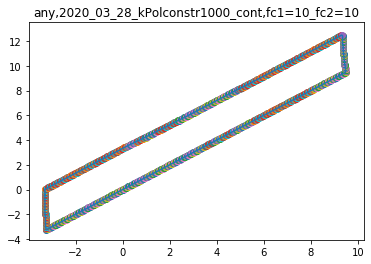

added


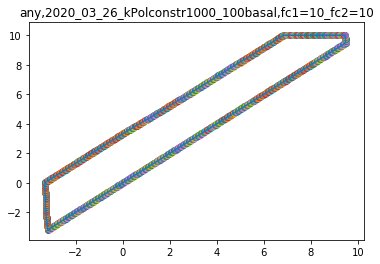

added


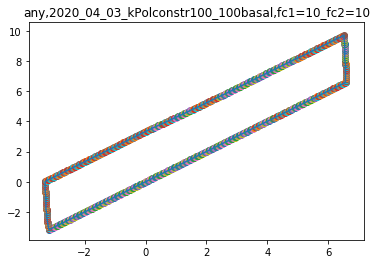

added


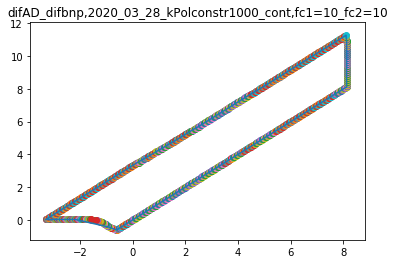

added


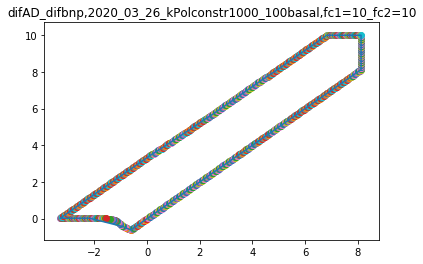

added


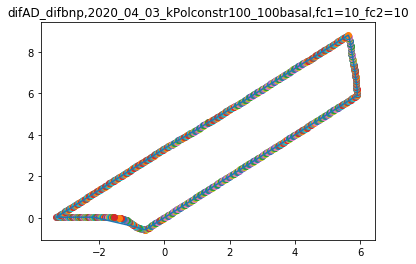

added


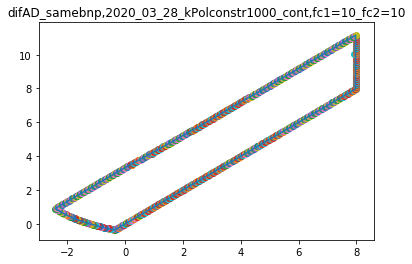

added


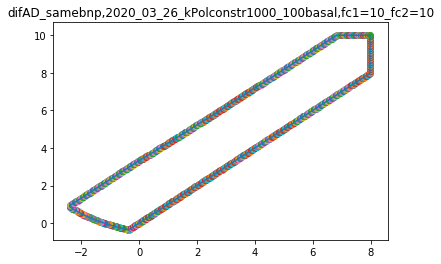

added


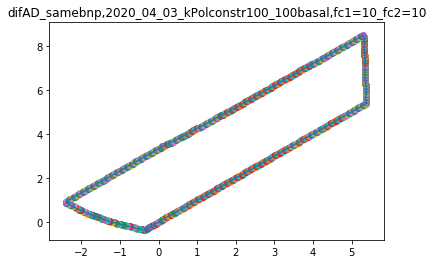

added


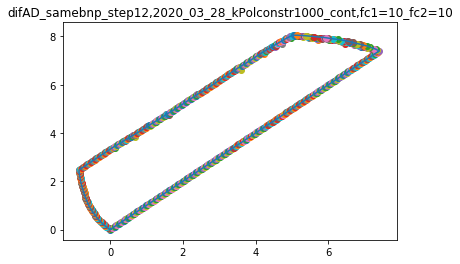

added


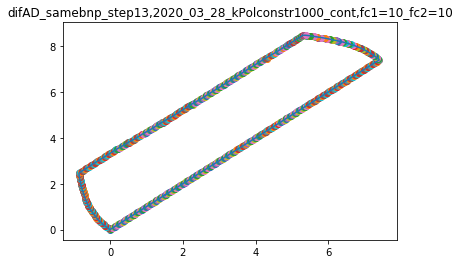

added


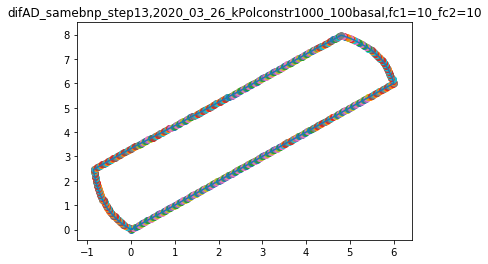

added


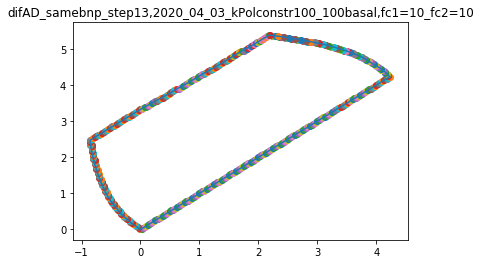

added


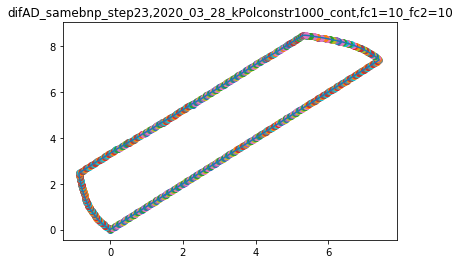

added


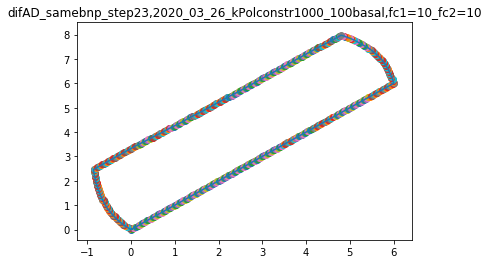

added


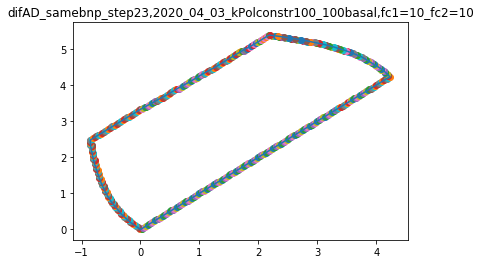

added


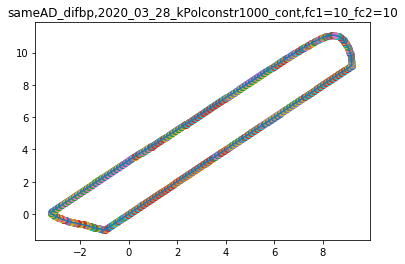

added


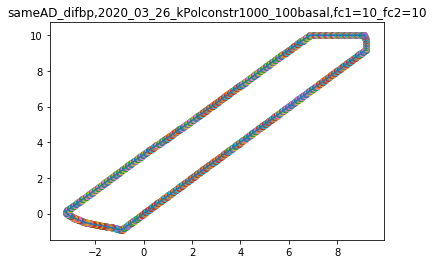

added


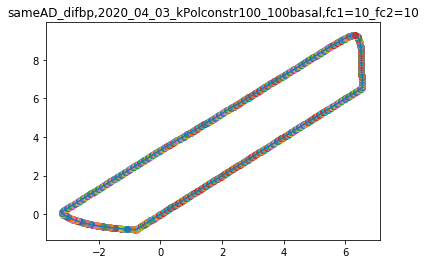

added


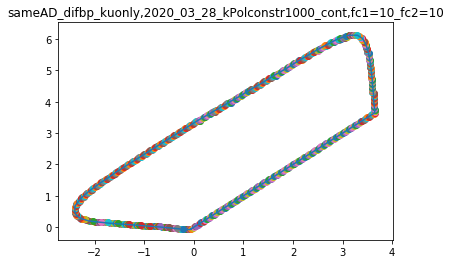

added


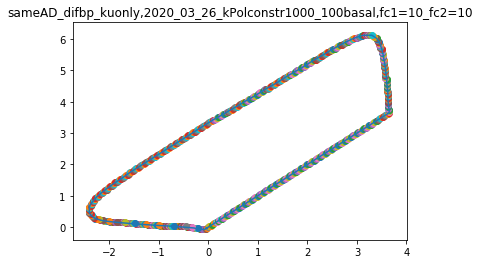

added


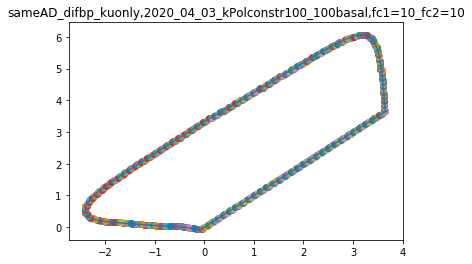

added


In [12]:
allashapes2=dict()
for key1 in allashapes.keys():
    for key2 in allashapes[key1].keys():
        for key3 in allashapes[key1][key2].keys():
            if allashapes[key1][key2][key3] is None:
                points=allpoints[key1][key2][key3]
                ashape=alphashape.alphashape(points,alpha=0.5)
                try:
                    [plt.scatter(pt[0],pt[1]) for pt in points]
                    plt.plot(*ashape.exterior.xy)
                    plt.title("%s,%s,%s"%(key1,key2,key3))
                    plt.show()
                    if not key1 in allashapes2.keys():
                        allashapes2[key1]=dict()
                    if not key2 in allashapes2[key1].keys():
                        allashapes2[key1][key2]=dict()
                    allashapes2[key1][key2][key3]=ashape
                    print("added")
                except:
                    found=False
                    for alpha in [0.1,0.075,0.07,0.06,0.05,0.03,0.01]:
                        if not found:
                            ashape=alphashape.alphashape(points,alpha=alpha)
                            try:

                                [plt.scatter(pt[0],pt[1]) for pt in points]
                                plt.plot(*ashape.exterior.xy)
                                plt.title("%s,%s,%s,%g"%(key1,key2,key3,alpha))
                                plt.show()
                                if not key1 in allashapes2.keys():
                                    allashapes2[key1]=dict()
                                if not key2 in allashapes2[key1].keys():
                                    allashapes2[key1][key2]=dict()
                                allashapes2[key1][key2][key3]=ashape
                                print(key1,key2,key3)
                                found=True
                            except:
                                continue
                    
                    if not found:
                        if not key1 in allashapes2.keys():
                            allashapes2[key1]=dict()
                        if not key2 in allashapes2[key1].keys():
                            allashapes2[key1][key2]=dict()
                        allashapes2[key1][key2][key3]=None
                            
                        
                            
                    
                    

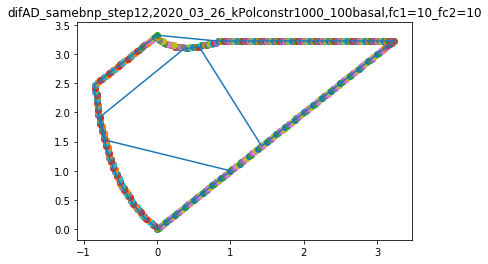

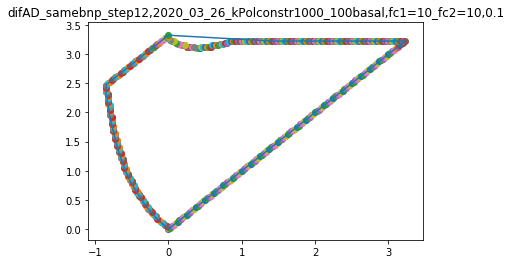

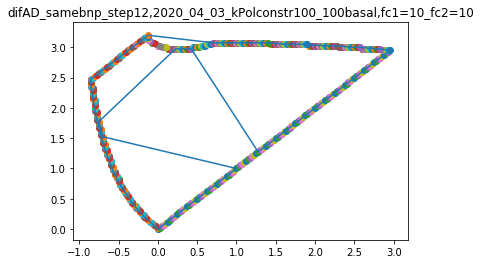

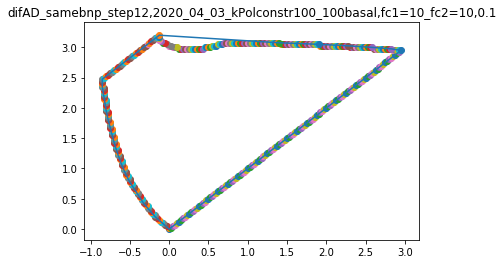

In [13]:
#some ashapes for step12 are problematic

for key1 in allashapes.keys():
    if "step12" in key1:
        for key2 in allashapes[key1].keys():
            if "basal" in key2:
                for key3 in allashapes[key1][key2].keys():
                    if key3=="fc1=10_fc2=10":
                        points=allpoints[key1][key2][key3]
                        if allashapes[key1][key2][key3] is not None:

                            ashape=allashapes[key1][key2][key3]
                        else:
                            ashape=allashapes2[key1][key2][key3]

                        [plt.scatter(pt[0],pt[1]) for pt in points]
                        plt.plot(*ashape.exterior.xy)
                        plt.title("%s,%s,%s"%(key1,key2,key3))
                        plt.show()
                        
                        for alpha in [0.1]: #,0.075,0.05]:
                        
                            ashape=alphashape.alphashape(points,alpha=alpha)
                            [plt.scatter(pt[0],pt[1]) for pt in points]
                            plt.plot(*ashape.exterior.xy)
                            plt.title("%s,%s,%s,%g"%(key1,key2,key3,alpha))
                            plt.show()
                            allashapes[key1][key2][key3]=ashape
                    
                        
                            
                    
                    

In [14]:
for key1 in allashapes.keys():
    for key2 in allashapes[key1].keys():
        for key3 in allashapes[key1][key2].keys():
            if allashapes[key1][key2][key3] is None and allashapes2[key1][key2][key3] is None:
                print(key1,key2,key3)

In [27]:
dict_points=dict()

for key1 in allashapes.keys():
    dict_points[key1]=dict()
    for key2 in allashapes[key1].keys():
        dict_points[key1][key2]=dict()
        for key3 in allashapes[key1][key2].keys():
            ashape=allashapes[key1][key2][key3]
            if ashape is None:
                ashape=allashapes2[key1][key2][key3]
            xp,yp=ashape.exterior.xy
            dict_points[key1][key2][key3]={'x':list(xp),'y':list(yp)}
            #plt.plot(xp,yp)
            #plt.show()
            #sys.exit()

In [29]:
dict_points.keys()

dict_keys(['empty', 'any', 'difAD_difbnp', 'difAD_samebnp', 'difAD_samebnp_step12', 'difAD_samebnp_step13', 'difAD_samebnp_step23', 'difAD_samebnp_step11', 'sameAD_difbp', 'sameAD_difbp_kuonly', 'sameAD_difbnp'])

In [4]:
#save as json for future time
import json
filename='ashapes_compareconditions_2020_03_26.json'
json_string = json.dumps(dict_points)
datastore = json.loads(json_string)
with open(filename, 'w') as f:
    json.dump(datastore, f)

NameError: name 'dict_points' is not defined

# Can start from here

In [5]:
import json
filename='ashapes_compareconditions_2020_03_26.json'
ashapes=json.load(open(filename,'r'))
ashapes.keys()

dict_keys(['empty', 'any', 'difAD_difbnp', 'difAD_samebnp', 'difAD_samebnp_step12', 'difAD_samebnp_step13', 'difAD_samebnp_step23', 'difAD_samebnp_step11', 'sameAD_difbp', 'sameAD_difbp_kuonly', 'sameAD_difbnp'])

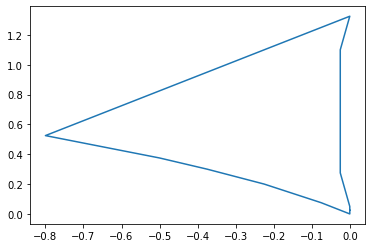

In [42]:

for key1 in ashapes.keys():
    for key2 in ashapes[key1].keys():
        for key3 in ashapes[key1][key2].keys():
            x=ashapes[key1][key2][key3]['x']
            y=ashapes[key1][key2][key3]['y']
            plt.plot(x,y)
            plt.show()
            break
        break
    break

In [6]:
linestyles=["-","-.",":","--"]
colors1={"fc1=10_fc2=10":"k","fc1=10_fc2=5":"grey","fc1=5_fc2=5":"blue","fc1=5_fc2=2.5":"royalblue"}
colors2={"fc1=10_fc2=10":"darkslategray","fc1=10_fc2=5":"darkgreen","fc1=5_fc2=5":"yellowgreen","fc1=5_fc2=2.5":"lightgreen"}
colors3={"fc1=10_fc2=10":"brown","fc1=10_fc2=5":"red","fc1=5_fc2=5":"orange","fc1=5_fc2=2.5":"plum"}
allcolors=[colors1,colors2,colors3]

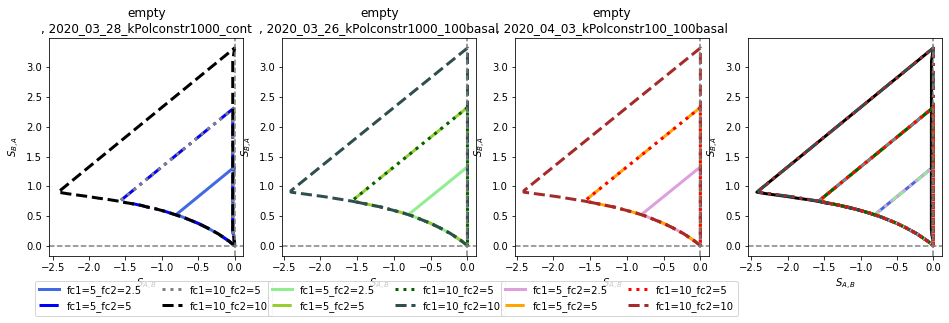

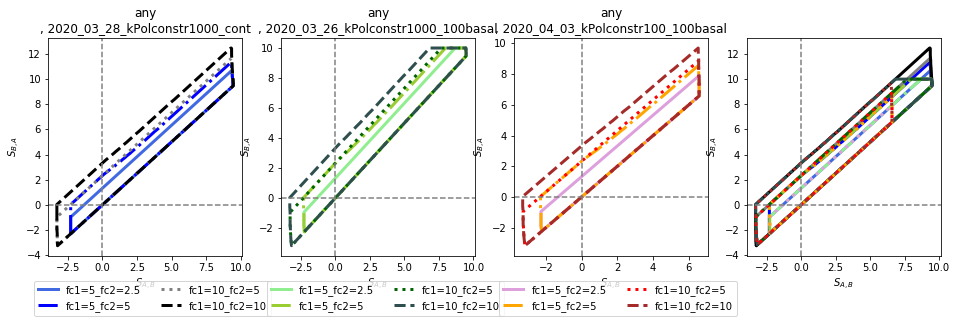

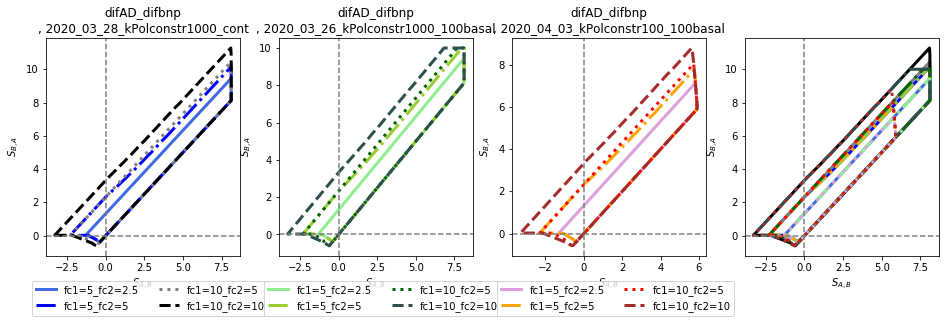

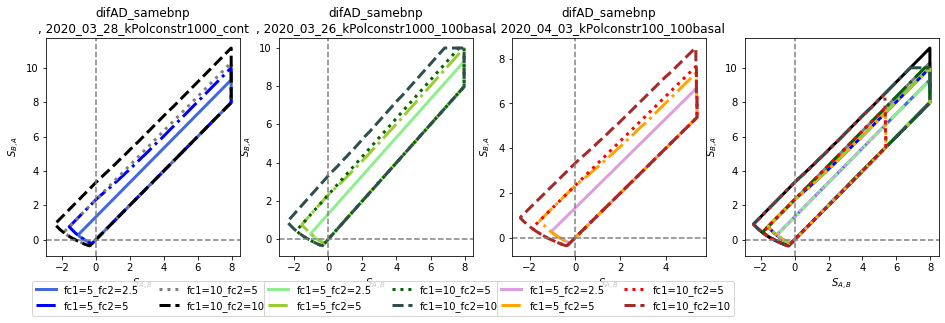

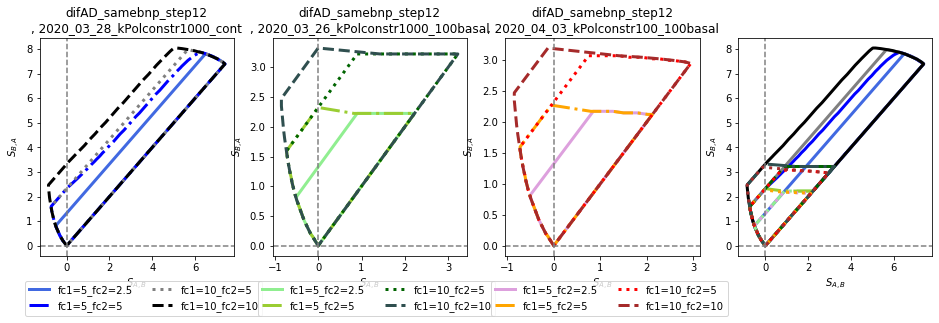

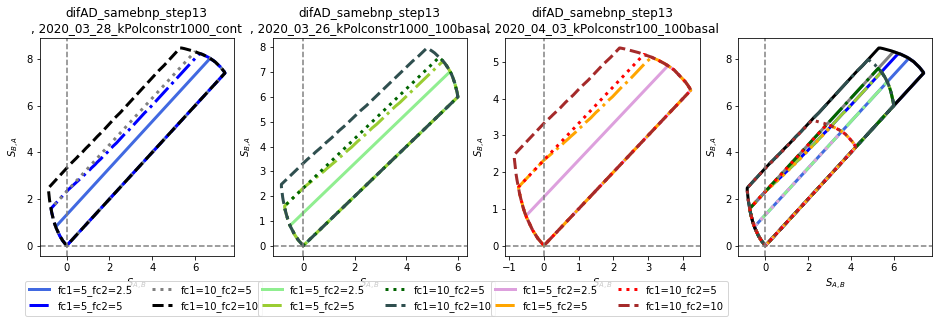

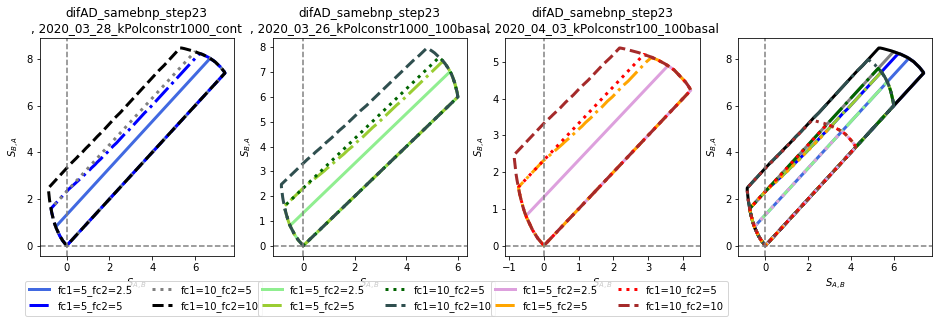

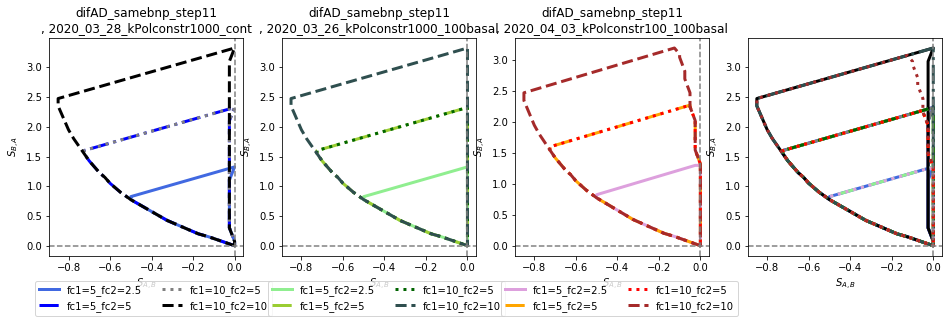

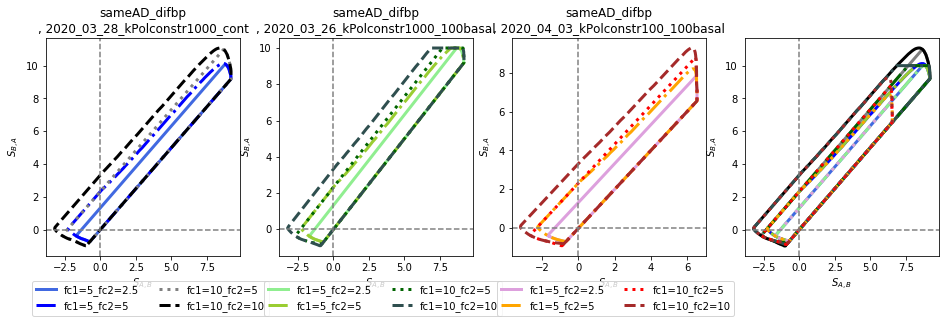

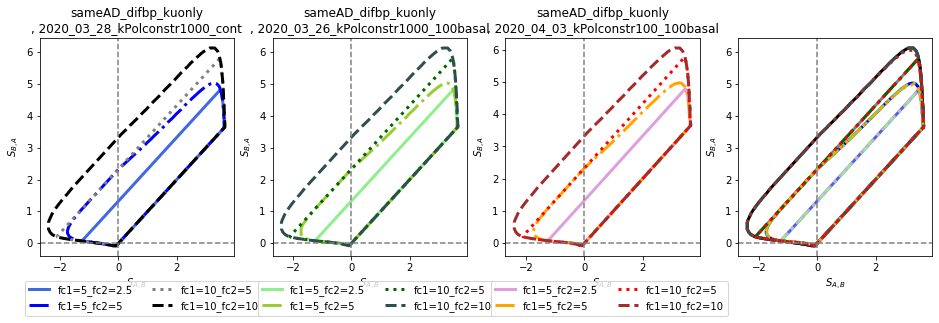

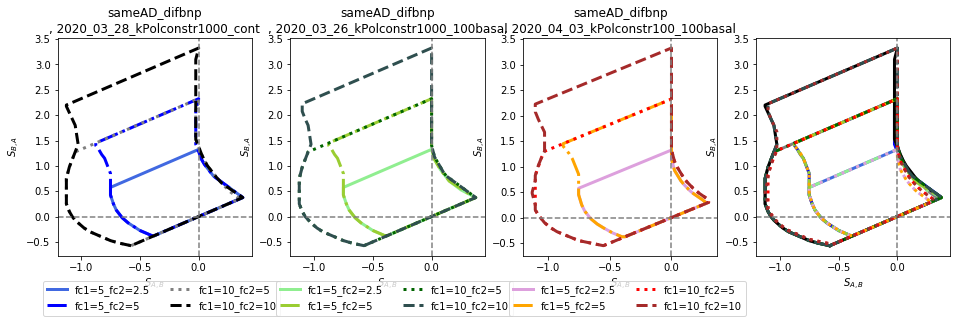

In [70]:
for cnum,case in enumerate(allcases):
    fig,axes=plt.subplots(1,4,figsize=(16,4)) 
    for b,base in enumerate(bases):
        linestyle=linestyles[b]
        
        #axes_=[axes[b//2][b%2],axes[1][-1]]
        axes_=[axes[b],axes[-1]]
        axes_[0].set_title("%s\n, %s"%(case,base))
        colors=allcolors[b]
        for k,key3 in enumerate(ashapes[case][base].keys()):
            ashape=ashapes[case][base][key3]
            x=ashape['x']
            y=ashape['y']
            ax1=axes_[0]
            ax2=axes_[-1]
            
            ax1.plot(x,y,label=key3,color=colors[key3],linestyle=linestyles[k],linewidth=3) #,marker=marker)
            ax2.plot(x,y,label=key3,color=colors[key3],linestyle=linestyle,linewidth=3) #,marker=marker)
        
        
            
        #if cnum==0:
        #    axes_[-1].legend(loc="upper right",ncol=4,bbox_to_anchor=(1,1))
        
    for ax in axes.flatten():
        ax.set_xlabel(r"$S_{A,B}$") #,usetex=True)
        ax.set_ylabel(r"$S_{B,A}$") #,usetex=True)
        #ax.set_xlim(col_ar[0],col_ar[-1])
        #ax.set_ylim(row_ar[0],row_ar[-1])
        #ax.set_title("fc1=50,fc2=10")
        
        ax.axhline(y=0,linestyle='--',color='gray')
        ax.axvline(x=0,linestyle='--',color='gray')
    for ax in axes.flatten()[0:3]:
        ax.legend(loc='lower left',bbox_to_anchor=(-0.1,-0.3),ncol=2)
    #plt.tight_layout()
    plt.show()

Difference becomes apparent when basal restricted to 100, and fold change with respect to basal restricted to 100X. 

2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0


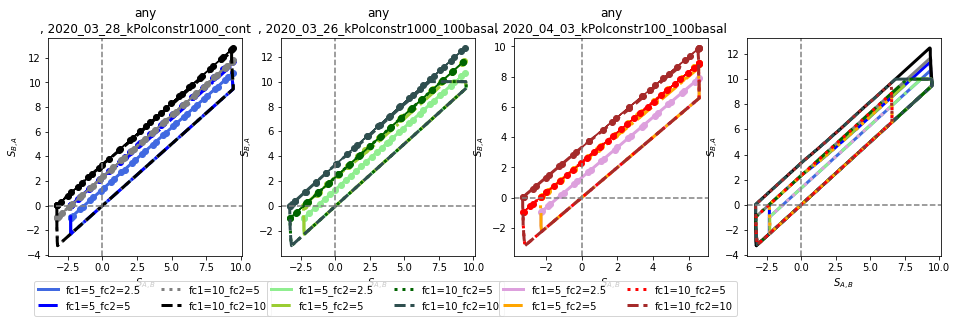

2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0


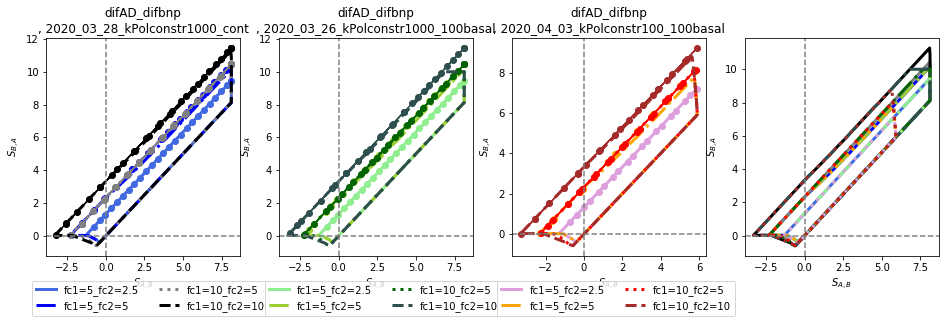

2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0


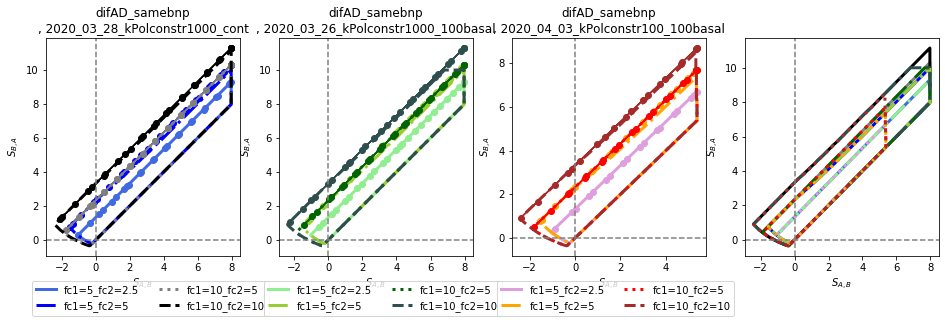

2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0


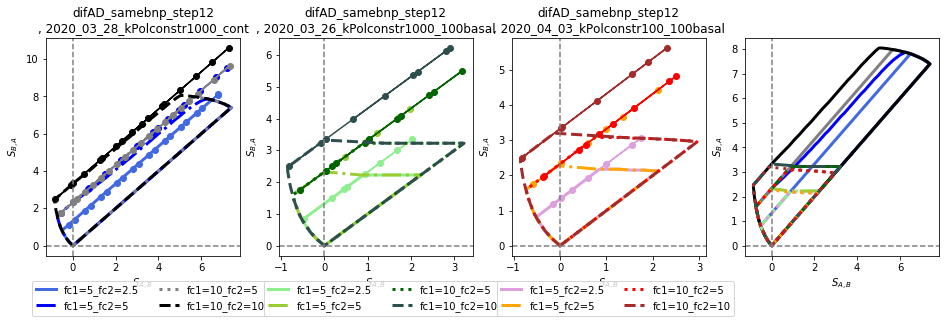

2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0


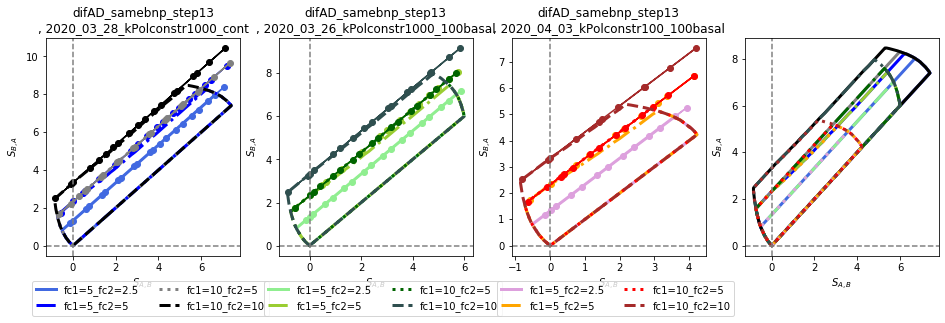

2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0


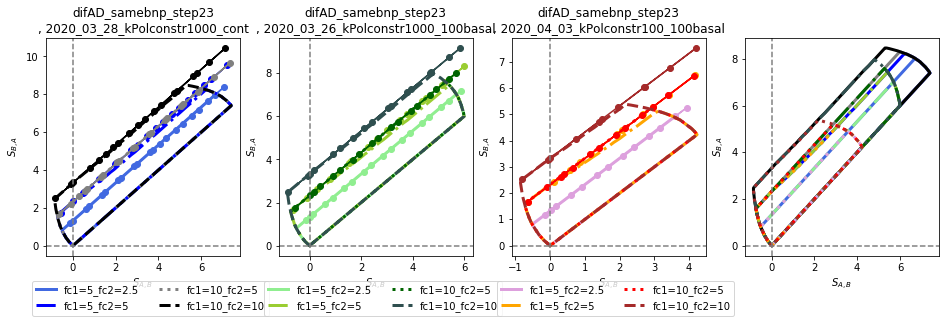

2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0


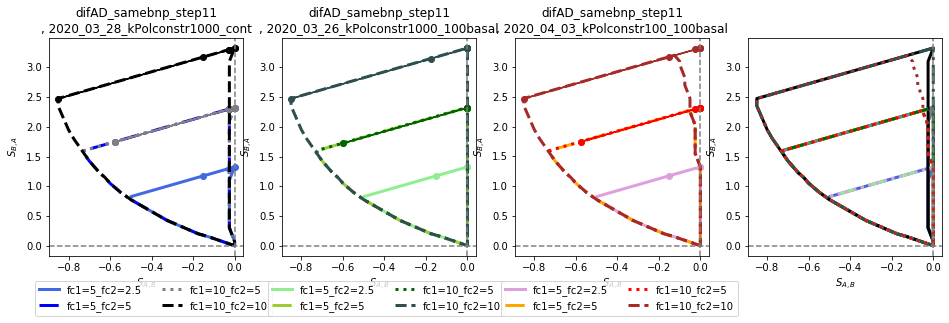

2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0


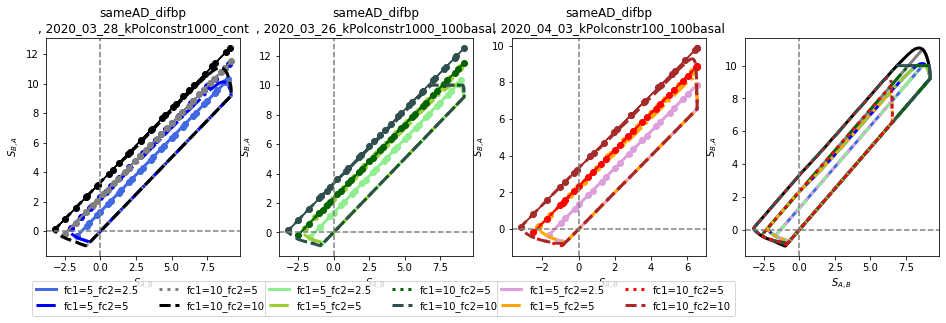

2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0


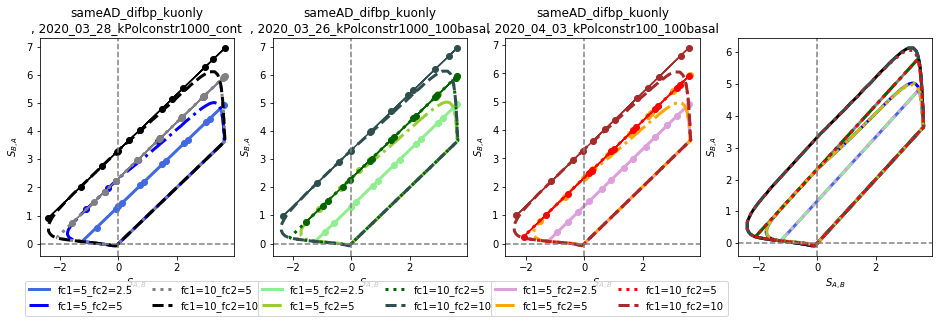

2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0


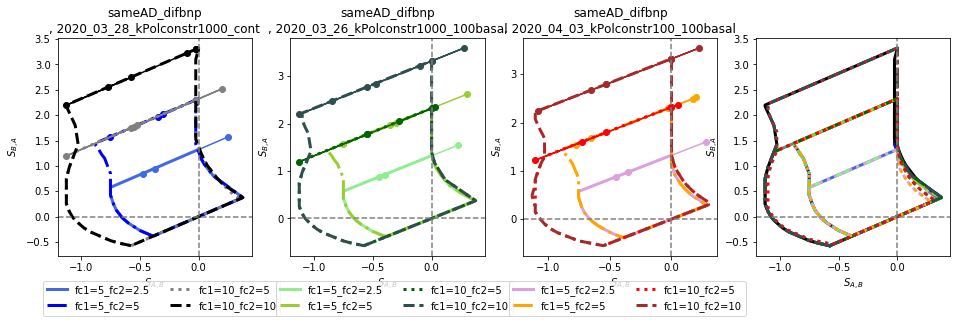

2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0
2.5
5.0
5.0
10.0


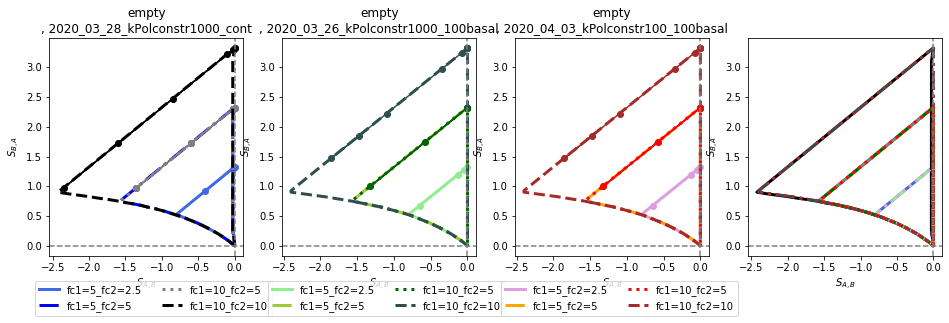

In [19]:
#Same as above, making sure that upper boundary coincides with the theoretical limit of SAB+log2(fc2)
for cnum,case in enumerate(allcases):
    fig,axes=plt.subplots(1,4,figsize=(16,4)) 
    for b,base in enumerate(bases):
        linestyle=linestyles[b]
        
        #axes_=[axes[b//2][b%2],axes[1][-1]]
        axes_=[axes[b],axes[-1]]
        axes_[0].set_title("%s\n, %s"%(case,base))
        colors=allcolors[b]
        for k,key3 in enumerate(ashapes[case][base].keys()):
            fc2=float(key3.split("_")[-1].split("=")[-1])
            print(fc2)
            ashape=ashapes[case][base][key3]
            x=ashape['x']
            y=ashape['y']
            ax1=axes_[0]
            ax2=axes_[-1]
            
            ax1.plot(x,y,label=key3,color=colors[key3],linestyle=linestyles[k],linewidth=3) #,marker=marker)
            ax1.plot(x[::30],(x+np.log2(fc2))[::30],color=colors[key3],marker='o')
            ax2.plot(x,y,label=key3,color=colors[key3],linestyle=linestyle,linewidth=3) #,marker=marker)
        
        
            
        #if cnum==0:
        #    axes_[-1].legend(loc="upper right",ncol=4,bbox_to_anchor=(1,1))
        
    for ax in axes.flatten():
        ax.set_xlabel(r"$S_{A,B}$") #,usetex=True)
        ax.set_ylabel(r"$S_{B,A}$") #,usetex=True)
        #ax.set_xlim(col_ar[0],col_ar[-1])
        #ax.set_ylim(row_ar[0],row_ar[-1])
        #ax.set_title("fc1=50,fc2=10")
        
        ax.axhline(y=0,linestyle='--',color='gray')
        ax.axvline(x=0,linestyle='--',color='gray')
    for ax in axes.flatten()[0:3]:
        ax.legend(loc='lower left',bbox_to_anchor=(-0.1,-0.3),ncol=2)
    #plt.tight_layout()
    plt.show()

In [2]:
46+17

63